# Pytorch Computer vision

In [2]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

print(torch.__version__)
print(torchvision.__version__)

2.3.0+cu121
0.18.0+cu121


## 1. Getting a dataset

FasshionMNIST


In [3]:
from torchvision import datasets
train_dataset = datasets.FashionMNIST(root="data",
                                      train=True,
                                      download=True,
                                      transform=torchvision.transforms.ToTensor(),
                                      target_transform=None)

test_dataset = datasets.FashionMNIST(root="data",
                                     train=False,
                                     download=True,
                                     transform=torchvision.transforms.ToTensor(),
                                     target_transform=None)

100%|██████████| 26421880/26421880 [00:14<00:00, 1833090.30it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 59389.00it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:06<00:00, 709279.05it/s] 


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 17136727.77it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [4]:
len(train_dataset), len(test_dataset)

(60000, 10000)

In [5]:
image, label = train_dataset[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [6]:
class_names = train_dataset.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [7]:
class_to_idx = train_dataset.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [8]:
image.shape, class_names[label]

(torch.Size([1, 28, 28]), 'Ankle boot')

### 1.2 Visualizing our data

image shape: torch.Size([1, 28, 28])


Text(0.5, 1.0, 'Ankle boot')

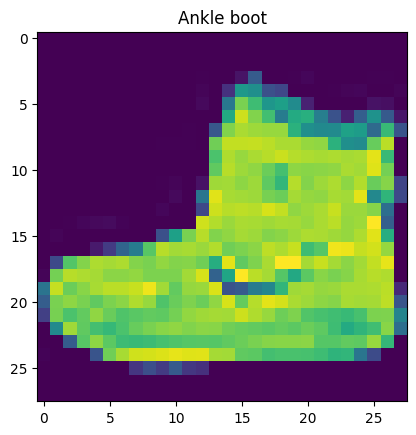

In [9]:
image, label = train_dataset[0]
print(f"image shape: {image.shape}")
plt.imshow(image.reshape(28, 28, 1))
plt.title(class_names[label])

(-0.5, 27.5, 27.5, -0.5)

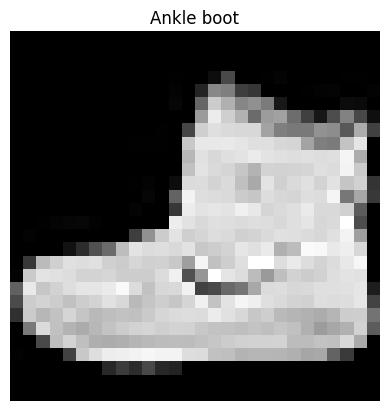

In [10]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)

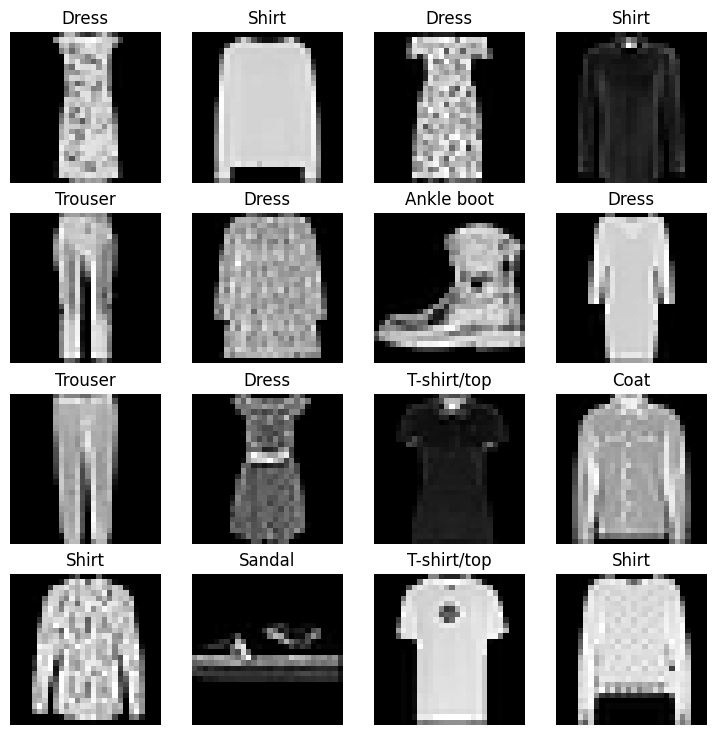

In [11]:
# torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows*cols+1):
  random_idx = torch.randint(0, len(train_dataset), size=[1]).item()
  img, label = train_dataset[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(class_names[label])
  plt.axis(False)

## 2. Prepare DataLoader

In [12]:
train_dataloader = torch.utils.data.DataLoader(dataset=train_dataset,
                                                batch_size=32,
                                                shuffle=True)

test_dataloader = torch.utils.data.DataLoader(dataset=test_dataset,
                                               batch_size=32,
                                              shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x79e0753e1e40>,
 <torch.utils.data.dataloader.DataLoader at 0x79e075701300>)

In [13]:
len(train_dataloader), len(test_dataloader)

(1875, 313)

In [14]:
train_features_batch, train_label_batch = next(iter(train_dataloader))
train_features_batch.shape

torch.Size([32, 1, 28, 28])

(-0.5, 27.5, 27.5, -0.5)

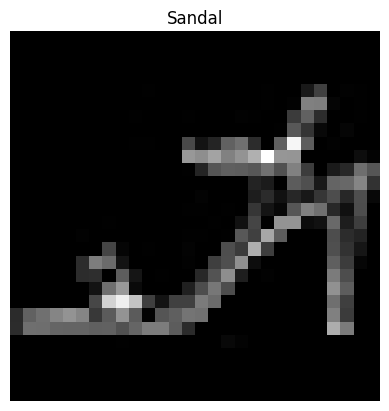

In [15]:
# torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_label_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)

## 3. Model 0: Build a basline model

In [16]:
flatten_model = nn.Flatten()
x = train_features_batch[0]
output = flatten_model(x)
output.shape, x.shape

(torch.Size([1, 784]), torch.Size([1, 28, 28]))

In [17]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [18]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
  def __init__(self,
               input_shape,
               hidden_units,
               output_shape):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape, out_features=hidden_units),
        nn.Linear(in_features=hidden_units, out_features=output_shape)
    )

  def forward(self, x):
    return self.layer_stack(x)

model_0 = FashionMNISTModelV0(input_shape=784,
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)
model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [19]:
dummy_x = torch.rand([1, 1, 28, 28]).to(device)
model_0(dummy_x)

tensor([[ 0.2933, -0.0414,  0.2599,  0.1333,  0.1665, -0.1022,  0.4453,  0.1629,
          0.0373,  0.1278]], grad_fn=<AddmmBackward0>)

In [20]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0157,  0.0091, -0.0217,  ...,  0.0269,  0.0016,  0.0187],
                      [ 0.0349, -0.0270, -0.0354,  ...,  0.0066,  0.0123, -0.0055],
                      [-0.0082, -0.0024,  0.0238,  ..., -0.0229, -0.0312, -0.0155],
                      ...,
                      [ 0.0026, -0.0255, -0.0144,  ...,  0.0030, -0.0072,  0.0157],
                      [-0.0222, -0.0224, -0.0202,  ..., -0.0332,  0.0260,  0.0172],
                      [-0.0137,  0.0023,  0.0150,  ..., -0.0327, -0.0023, -0.0085]])),
             ('layer_stack.1.bias',
              tensor([ 0.0269, -0.0174, -0.0108, -0.0018,  0.0049, -0.0252, -0.0093,  0.0133,
                       0.0188,  0.0013])),
             ('layer_stack.2.weight',
              tensor([[-0.0433,  0.0862, -0.0218, -0.0204,  0.0853, -0.1599, -0.2817,  0.0340,
                       -0.1303, -0.2150],
                      [ 0.2414, -0.0686, -0.1493, -0.2608,  0.1142, -0.0280, -0.

### 3.1 Setup loss, optimizer and evaluation metrics

In [21]:
!wget https://raw.githubusercontent.com/yacin-hamdi/deep_learning/master/pytorch/helper_functions.py

--2024-05-23 15:17:24--  https://raw.githubusercontent.com/yacin-hamdi/deep_learning/master/pytorch/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10160 (9.9K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]   9.92K  --.-KB/s    in 0.001s  

2024-05-23 15:17:24 (9.40 MB/s) - ‘helper_functions.py’ saved [10160/10160]



In [22]:
from helper_functions import accuracy_fn

In [23]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_0.parameters(),
                            lr=0.001)

### 3.2 Creating a function to time our experiments

In [24]:
from timeit import default_timer as timer
def print_train_time(start: float,
                     end: float,
                     device: torch.device = None):
  """Prints difference between start and end time."""
  total_time = end - start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time

In [25]:
start_time = timer()

end_time = timer()
print_train_time(start_time, end_time, "cpu")

Train time on cpu: 0.000 seconds


5.649999999945976e-05

In [26]:
from tqdm.auto import tqdm

### 3.3 Creating a training loop and training on batches of data

In [27]:
epochs = 3
torch.manual_seed(42)
torch.cuda.manual_seed(42)
train_time_start = timer()

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n------")
  model_0.train()
  losses = 0
  acc = 0
  val_loss = 0
  val_acc = 0
  for batch, (X, y) in enumerate(train_dataloader):
    X = X.to(device)
    y = y.to(device)

    y_logits = model_0(X)
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)

    loss = loss_fn(y_logits, y)
    losses += loss
    acc += accuracy_fn(y, y_pred)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if batch % 400 == 0:
      print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples.")

  losses /= len(train_dataloader)
  acc /= len(train_dataloader)
  model_0.eval()
  with torch.inference_mode():
    for image, label in test_dataloader:
      image = image.to(device)
      label = label.to(device)

      y_logits = model_0(image)
      y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)

      val_loss += loss_fn(y_logits, y_pred)
      val_acc += accuracy_fn(label, y_pred)

    val_loss /= len(test_dataloader)
    val_acc /=len(test_dataloader)

  print(f"loss:{losses:.4f}, acc:{acc:.2f}|val_loss:{val_loss:.4f}, val_acc:{val_acc:.2f} ")
train_time_end = timer()
total_train_time_model_0 = print_train_time(start=train_time_start,
                                              end=train_time_end,
                                              device=str(next(model_0.parameters()).device))



  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.
loss:1.9051, acc:34.78|val_loss:1.3734, val_acc:53.81 
Epoch: 1
------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.
loss:1.3180, acc:63.27|val_loss:0.9432, val_acc:65.03 
Epoch: 2
------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.
loss:1.0106, acc:66.64|val_loss:0.7228, val_acc:67.18 
Train time on cpu: 32.733 seconds


## 4.Make predictions and get Model 0 results

In [28]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in tqdm(data_loader):
      X = X.to(device)
      y = y.to(device)
      y_pred = model(X)

      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true=y,
                         y_pred=y_pred.argmax(dim=1))

    loss /= len(data_loader)
    acc /= len(data_loader)

  return {"model_name":model.__class__.__name__,
          "model_loss":loss.item(),
          "model_acc": acc}


model_0_results = eval_model(model=model_0,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)
model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.934971034526825,
 'model_acc': 67.18250798722045}

## 5. Setup device agnostic-code

In [29]:
import torch
from torch import nn

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [30]:
class FashionMNISTModelV1(nn.Module):
  def __init__(self,
               input_shape,
               hidden_units,
               output_shape):
    super().__init__()
    self.flatten = nn.Flatten()
    self.layer_1 = nn.Linear(in_features=input_shape, out_features=hidden_units)
    self.layer_2 = nn.Linear(in_features=hidden_units, out_features=output_shape)
    self.relu1 = nn.ReLU()
    self.relu2 = nn.ReLU()

  def forward(self, x):
    x = self.flatten(x)
    x = self.layer_1(x)
    x = self.relu1(x)
    x = self.layer_2(x)
    return self.relu2(x)

model_1 = FashionMNISTModelV1(784, 10, len(class_names)).to(device)
model_1

FashionMNISTModelV1(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (layer_1): Linear(in_features=784, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (relu1): ReLU()
  (relu2): ReLU()
)

### 6.1 Setup loss, optimizer and evalution metrics

In [31]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_1.parameters(),
                            lr=0.1)

### 6.2 Functionizing training and evaluation/testing loop

In [32]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               optimizer: torch.optim.Optimizer,
               device: torch.device = device):

  train_loss, train_acc = 0, 0

  model.train()
  for batch, (X, y) in enumerate(data_loader):
    X, y = X.to(device), y.to(device)

    y_pred = model(X)

    loss = loss_fn(y_pred, y)
    acc = accuracy_fn(y, y_pred.argmax(dim=1))
    train_loss += loss
    train_acc += acc

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  train_loss /= len(data_loader)
  train_acc /= len(data_loader)

  print(f"loss:{train_loss:.4f}, acc:{train_acc:.2f}%")



In [33]:
def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn:torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
  test_loss, test_acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in data_loader:
      X, y = X.to(device), y.to(device)
      y_pred = model(X)

      loss = loss_fn(y_pred, y)
      acc = accuracy_fn(y, y_pred.argmax(dim=1))

      test_loss += loss
      test_acc += acc

    test_loss /= len(data_loader)
    test_acc /= len(data_loader)
    print(f"val_loss:{test_loss:.4f}, val_acc:{test_acc:.2f}%")


In [34]:
epoch = 3
start_timer = timer()
# torch.manual_seed(42)
# torch.cuda.manual_seed(42)

for epoch in tqdm(range(epoch)):
  print(f"epoch:{epoch}\n-------")
  train_step(model=model_1,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             accuracy_fn=accuracy_fn,
             optimizer=optimizer,)

  test_step(model=model_1,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn)

end_timer = timer()
total_train_time_model_1 = print_train_time(start=start_timer,
                 end=end_timer,
                 device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

epoch:0
-------
loss:0.9122, acc:68.27%
val_loss:0.7401, val_acc:73.02%
epoch:1
-------
loss:0.6426, acc:77.05%
val_loss:0.4825, val_acc:82.99%
epoch:2
-------
loss:0.4574, acc:83.83%
val_loss:0.4642, val_acc:83.39%
Train time on cpu: 32.650 seconds


In [35]:
# Get model_1 results dictionary
model_1_results = eval_model(model=model_1,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)

  0%|          | 0/313 [00:00<?, ?it/s]

In [38]:
model_1_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.4641698896884918,
 'model_acc': 83.38658146964856}

## Model 2: Building a Convolutional Neural Network (CNN)

In [43]:
class FashionMNISTModelV2(nn.Module):
  def __init__(self,
               input_shape,
               hidden_units,
               output_shape):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)

    )

    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )

    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*0,
                  out_features=output_shape)
    )

  def forward(self, x):
    x = self.conv_block_1(x)
    print(x.shape)
    x = self.conv_block_2(x)
    print(x.shape)
    return self.classifier(x)



In [44]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1,
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)

/usr/local/lib/python3.10/dist-packages/torch/nn/init.py:452: UserWarning: Initializing zero-element tensors is a no-op
  warnings.warn("Initializing zero-element tensors is a no-op")
